In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

In [2]:
## Find all .csv in specified directory
# directory path
dir = r"project_datasets\\"
# glob finds and puts all the file paths into a list
all_files = glob.glob(dir + "*.csv")

In [3]:
## Using RegEx take the name and format it (Format => "df_A")
pattern = re.compile(r'(?<=\\)(.*?)(?=\.)')
def get_file_names(x):
    files = x
    saved = []
    for file in files:
        for name in re.findall(pattern, file):
            name = name.replace("data","df")
            ## .lower() could be removed it's just that our existing document uses lower case (df_a, df_d)
            name = name.lower()
            saved.append(name)
    return saved

In [4]:
## Read all the file name and paths and assign them to variable
dataframe_names = get_file_names(all_files)
for index, item in enumerate(dataframe_names):
    globals()['%s' % item] = pd.read_csv(all_files[index])


In [5]:
print("Available Dataframes:")
print(dataframe_names)

Available Dataframes:
['df_a', 'df_aa', 'df_ab', 'df_ac', 'df_ad', 'df_b', 'df_c', 'df_d', 'df_e', 'df_f', 'df_g', 'df_h', 'df_i', 'df_j', 'df_k', 'df_m', 'df_n', 'df_o', 'df_p', 'df_q', 'df_r', 'df_s', 'df_t', 'df_u', 'df_v', 'df_w', 'df_x', 'df_y', 'df_z']


In [6]:
## Convert all column types to date_time
for item in dataframe_names:
    globals()['%s' % item]["EventDt"] = pd.to_datetime(globals()['%s' % item]["EventDt"])

In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312657 entries, 0 to 312656
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DeviceId  312657 non-null  object        
 1   EventDt   312657 non-null  datetime64[ns]
 2   Temp      312657 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.2+ MB


In [8]:
df_a

,DeviceId,EventDt,Temp
0,A,2018-11-18 16:12:19.437,19.41
1,A,2018-11-18 16:17:19.430,19.39
2,A,2018-11-18 16:22:19.433,19.37
3,A,2018-11-18 16:27:19.430,19.41
4,A,2018-11-18 16:32:19.427,19.39
...,...,...,...
312652,A,2021-11-18 15:44:37.000,21.90
312653,A,2021-11-18 15:49:37.000,21.83
312654,A,2021-11-18 15:54:37.007,21.73
312655,A,2021-11-18 15:59:36.997,21.64


In [9]:
average_temps = []
for item in dataframe_names:
    mean_temp = globals()['%s' % item]["Temp"].mean()
    average_temps.append(mean_temp)
    
mean_temp_dev_dictionary = {"Device":dataframe_names,"Mean Temperature":average_temps}
mean_temp_dev = pd.DataFrame.from_dict(mean_temp_dev_dictionary)
mean_temp_dev

,Device,Mean Temperature
0,df_a,17.361581
1,df_aa,-18.455373
2,df_ab,17.395446
3,df_ac,33.215963
4,df_ad,17.963440
5,df_b,5.668059
6,df_c,11.344839
7,df_d,18.360038
8,df_e,-23.629366
9,df_f,20.321201


<AxesSubplot:xlabel='Device', ylabel='Mean Temperature'>

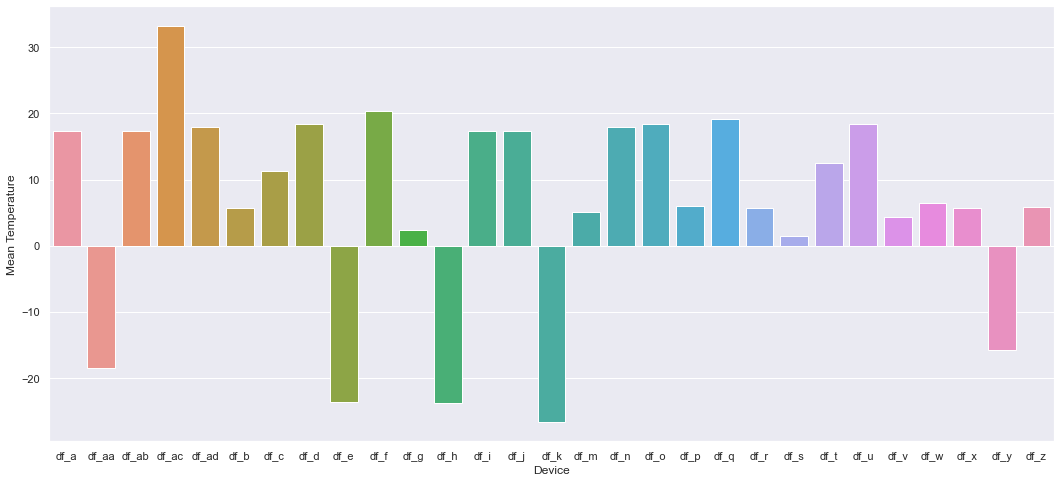

In [10]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="Device", y="Mean Temperature", data=mean_temp_dev)

In [11]:
## If the code is confusing TLDR:
## - All dataframes are imported (df_a,df_aa, etc...)
## - mean_temp_dev dataframe has the names of all dataframes and their average temperature